In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, SimpleRNN, GRU, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [ ]:
stock_data = pd.read_csv('Data/GOOG.csv')
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0,1


In [3]:
stock_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   str    
 1   date         1258 non-null   str    
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   int64  
 13  splitFactor  1258 non-null   int64  
dtypes: float64(8), int64(4), str(2)
memory usage: 137.7 KB


In [4]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
high,1258.0,1.227431e+03,387.570872,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
low,1258.0,1.204176e+03,378.777094,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
open,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
volume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00
adjClose,1258.0,1.216317e+03,383.333358,668.260,9.608025e+02,1132.460,1.360595e+03,2521.60
adjHigh,1258.0,1.227431e+03,387.570873,672.300,9.687575e+02,1143.935,1.374345e+03,2526.99
adjLow,1258.0,1.204176e+03,378.777099,663.284,9.521825e+02,1117.915,1.348557e+03,2498.29
adjOpen,1258.0,1.215261e+03,382.446995,671.000,9.590050e+02,1131.150,1.361075e+03,2524.92
adjVolume,1258.0,1.601590e+06,696017.226844,346753.000,1.173522e+06,1412588.500,1.812156e+06,6207027.00


In [5]:
stock_data.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
google_stock_data = stock_data[['date','open','close']] # Extracting required columns
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) # Selecting only date
google_stock_data.set_index('date',drop=True,inplace=True) # Setting date column as index
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


#### Data Visualization

C:\Users\admin\AppData\Local\Temp\ipykernel_17332\52026741.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fg.show()


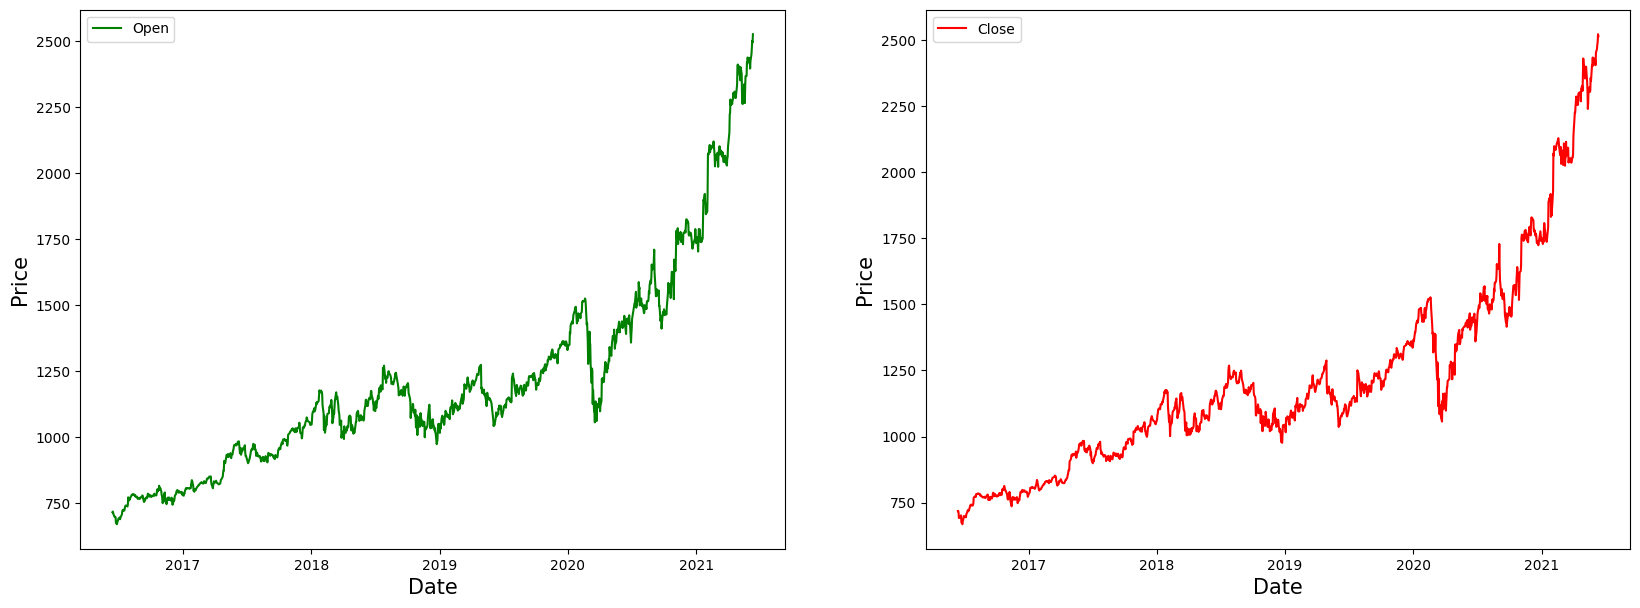

In [7]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

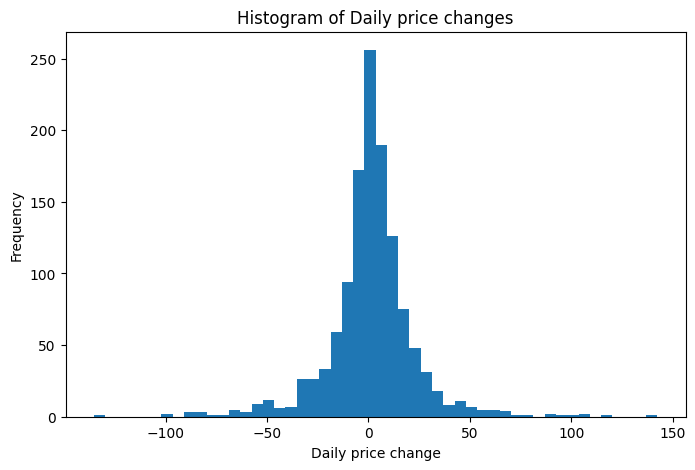

In [8]:
daily_changes = google_stock_data['close'].diff()
plt.figure(figsize=(8,5))
plt.hist(daily_changes.dropna(), bins=50 )
plt.title('Histogram of Daily price changes')
plt.xlabel('Daily price change')
plt.ylabel('Frequency')
plt.show()


## Data Pre-processing

In [ ]:
data = google_stock_data[['close']]

In [ ]:
# Scaling the data using Minmax scaler
scaler = MinMaxScaler()
normalized_data= scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=['close'])

In [13]:
inverse_data = scaler.inverse_transform(normalized_data)
inverse_data[:10]

array([[718.27],
       [718.92],
       [710.36],
       [691.72],
       [693.71],
       [695.94],
       [697.46],
       [701.87],
       [675.22],
       [668.26]])

In [ ]:
# Test Train split 
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
train_data = normalized_data[:training_size]
test_data  = normalized_data[training_size:]

train_data.shape, test_data.shape

1006

## Sequence Generation

In [16]:
# Function to create sequence of data for training and testing

def create_sequence(dataset, seq_length=50):
  sequences = []
  labels = []

  for index in range(len(dataset) - seq_length + 1): 
    sequences.append(dataset.iloc[index : index + seq_length].values)
    labels.append(dataset.iloc[index + seq_length - 1].values)
    
  return (np.array(sequences),np.array(labels))

In [17]:

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [18]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((957, 50, 1), (957, 1), (203, 50, 1), (203, 1))

# Simple RNN Model

In [19]:
rnn = Sequential([
    Input(shape=(train_seq.shape[1], train_seq.shape[2])),
    SimpleRNN(50, return_sequences= True),
    SimpleRNN(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

rnn.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [20]:
import tensorflow as tf
tf.keras.utils.plot_model(rnn,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [21]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = rnn.fit(train_seq, train_label, epochs= 100, callbacks= callbacks ,)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.1710
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015 - mean_absolute_error: 0.0296
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7626e-04 - mean_absolute_error: 0.0129
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.8707e-04 - mean_absolute_error: 0.0104
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1616e-04 - mean_absolute_error: 0.0113
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0333e-04 - mean_absolute_error: 0.0113
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.4334e-04 - mean_absolute_error: 0.0090
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1972e-04 - mean_absolute_error: 0.0081
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3836e-04 - mean_absolute_error: 0.0091
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.4208e-04 - mean_absolute_error: 0.00

In [22]:
rnn_pred = rnn.predict(test_seq)
rnn_pred_inverse = scaler.inverse_transform(rnn_pred)
y_test = scaler.inverse_transform(test_label)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

def evaluate_metrics(
    y_true,
    y_pred,
    eps=1e-8,
    decimals=3
):
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100

    return {
        "MAE": round(float(mae), decimals),
        "RMSE": round(float(rmse), decimals),
        "MAPE (%)": round(float(mape), decimals),
        "R2": round(float(r2), decimals)
    }

In [24]:
rnn_metrics = evaluate_metrics(y_test, rnn_pred_inverse)
print(rnn_metrics)

{'MAE': 11.371, 'RMSE': 14.669, 'MAPE (%)': 0.591, 'R2': 0.998}


## <span style="color: #d62d20">LSTM Model Architecture</span>

<span style="color: white"> 1. </span> Create a Sequential model.

<span style="color: white">2.</span> Add the first LSTM layer with 50 units and return sequences. The input shape is set to (50, 5), where 50 is the sequence length and 5 is the number of features ('open', 'high', 'low', 'volume', 'close').
   - **LSTM Layer 1:**
      - Units: 50
      - Input Shape: (50, 5)
      - Return Sequences: True

<span style="color: white">3.</span> Apply dropout regularization with a rate of 0.2 to mitigate overfitting.
   - **Dropout Layer 1:**
      - Rate: 0.2

<span style="color: white">4.</span> Add the second LSTM layer with 50 units and return sequences.
   - **LSTM Layer 2:**
      - Units: 50
      - Return Sequences: True

<span style="color: white">5.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 2:**
      - Rate: 0.2

<span style="color: white">6.</span> Add the third LSTM layer with 50 units.
   - **LSTM Layer 3:**
      - Units: 50

<span style="color: white">7.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 3:**
      - Rate: 0.2

<span style="color: white">8.</span> Add a fully connected Dense layer with 5 units as the output layer.
   - **Dense Layer:**
      - Units: 5 (output)

This model architecture comprises multiple LSTM layers with dropout regularization to prevent overfitting.


In [25]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.2)) 
model.add(LSTM(units=50, return_sequences=True))

model.add(Dropout(0.2)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

d:\_RSSA HCP057\svp\Projects\RNN\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs = 100

callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]

history = model.fit(
    train_seq,
    train_label,
    epochs= epochs,
    validation_data = (test_seq, test_label),
    verbose = 1,
    callbacks = callbacks
)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0079 - mean_absolute_error: 0.0643 - val_loss: 0.0438 - val_mean_absolute_error: 0.1920
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 9.6073e-04 - mean_absolute_error: 0.0232 - val_loss: 0.0034 - val_mean_absolute_error: 0.0473
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 7.6392e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0061 - val_mean_absolute_error: 0.0647
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 6.6581e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0099 - val_mean_absolute_error: 0.0862
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 7.7692e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0057 - val_mean_absolute_error: 0.0624
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 6.5927e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0065 - val_mean_absolute_error: 0.0674
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 5.6669e-04 - mean_ab

In [27]:

lstm_predictions = model.predict(test_seq)
lstm_pred_inverse = scaler.inverse_transform(lstm_predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [28]:
lstm_pred_inverse[:5]

array([[1570.0569],
       [1576.1553],
       [1592.0876],
       [1631.9524],
       [1635.0057]], dtype=float32)

In [29]:
lstm_metrics = evaluate_metrics(y_test, lstm_pred_inverse)
print(lstm_metrics)

{'MAE': 22.595, 'RMSE': 27.603, 'MAPE (%)': 1.168, 'R2': 0.992}


# GRU Model

In [30]:
gru = Sequential([
    Input(shape=(train_seq.shape[1], train_seq.shape[2])),
    GRU(50, return_sequences= True),
    GRU(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

gru.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [31]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history2 = gru.fit(
    train_seq,
    train_label,
    epochs= epochs,
    validation_data = (test_seq, test_label),
    verbose = 1,
    callbacks = callbacks
)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0040 - mean_absolute_error: 0.0460 - val_loss: 0.0045 - val_mean_absolute_error: 0.0620
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 1.9391e-04 - mean_absolute_error: 0.0108 - val_loss: 3.5562e-04 - val_mean_absolute_error: 0.0142
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 9.9853e-05 - mean_absolute_error: 0.0070 - val_loss: 3.4833e-04 - val_mean_absolute_error: 0.0141
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 9.4849e-05 - mean_absolute_error: 0.0068 - val_loss: 3.0132e-04 - val_mean_absolute_error: 0.0132
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.1499e-05 - mean_absolute_error: 0.0067 - val_loss: 3.4597e-04 - val_mean_absolute_error: 0.0142
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 8.3072e-05 - mean_absolute_error: 0.0064 - val_loss: 2.7676e-04 - val_mean_absolute_error: 0.0125
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 

In [32]:
gru_pred = gru.predict(test_seq)
#inverse predictions scaling
gru_inverse_pred = scaler.inverse_transform(gru_pred)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


In [33]:
gru_metrics = evaluate_metrics(y_test, gru_inverse_pred)
print(gru_metrics)

{'MAE': 3.935, 'RMSE': 5.53, 'MAPE (%)': 0.194, 'R2': 1.0}


In [34]:
df = pd.DataFrame([rnn_metrics, lstm_metrics, gru_metrics], index=["Simple RNN", "LSTM", "GRU"]).T
print(df)

          Simple RNN    LSTM    GRU
MAE           11.371  22.595  3.935
RMSE          14.669  27.603  5.530
MAPE (%)       0.591   1.168  0.194
R2             0.998   0.992  1.000


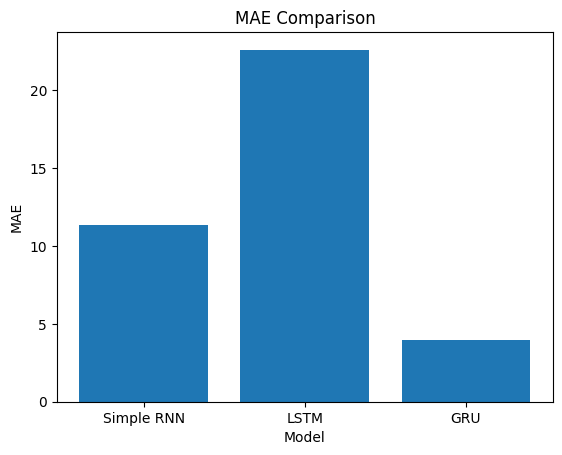

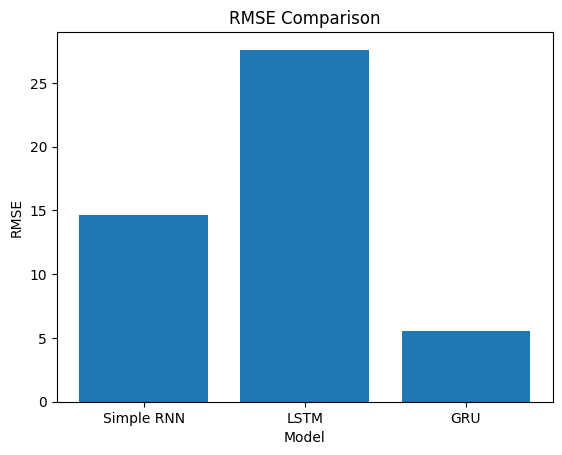

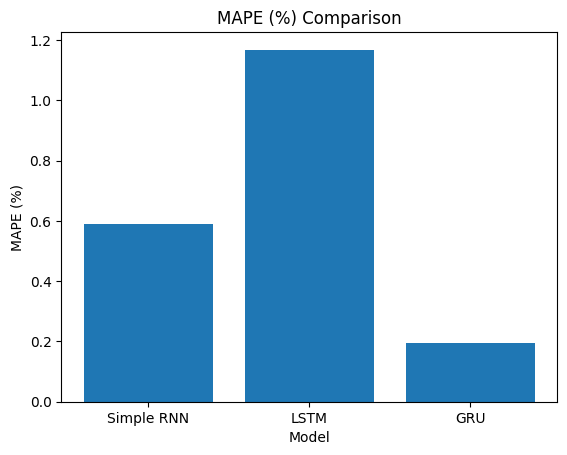

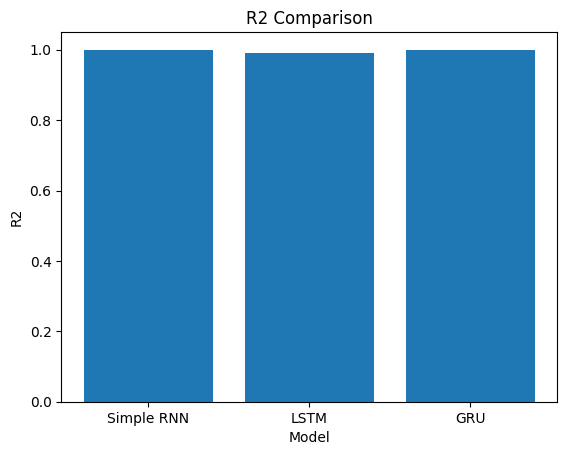

In [35]:
# Plot one metric at a time
for metric in df.index:
    plt.figure()
    plt.bar(df.columns, df.loc[metric])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.show()

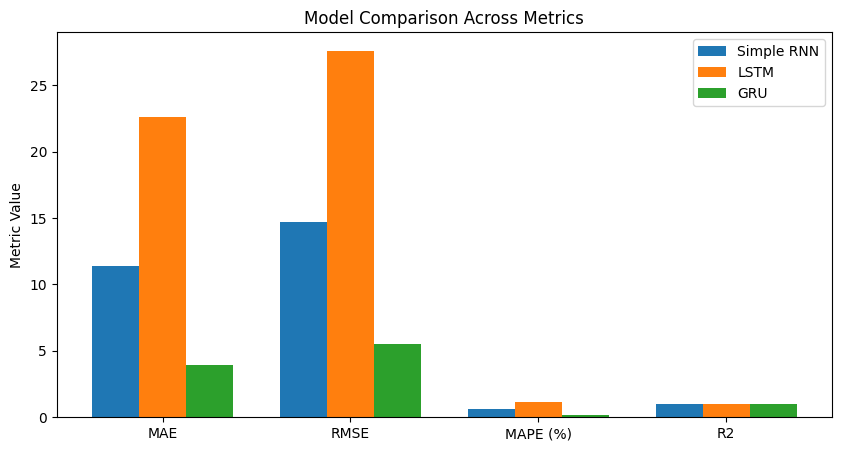

In [36]:
x = np.arange(len(df.index))
width = 0.25

plt.figure(figsize=(10, 5))

plt.bar(x - width, df["Simple RNN"], width, label="Simple RNN")
plt.bar(x, df["LSTM"], width, label="LSTM")
plt.bar(x + width, df["GRU"], width, label="GRU")

plt.xticks(x, df.index)
plt.ylabel("Metric Value")
plt.title("Model Comparison Across Metrics")
plt.legend()
plt.show()

## Predicting upcoming 10 days